# Smart Meters in London: Data Cleaning (Part 1/2)


This first jupyter notebook wants to analyse the data that has been retrieved from Kaggle, London Data Store and Accorn CICA Company. There are three main files to analyse and clean for this project: 

- Weather hourly data: 

The structure of this notebook is as follows:

1. Dataset overview
2. Data Cleaning: Missing values 
3. Data Cleaning: Outliers 
4. Date Time columns transformation 
5. Exporting tables to SQL 

__**Datasets that will be initially used for the project**__
- **information_households.csv**
- **weather_hourly_darksky.csv**
- **hhblock_dataset.zip : Block_12**
- **halfhourly_dataset.zip: Block_12** 

In [129]:
# Importing libraries required for the analysis 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
from sqlalchemy import create_engine 
import os

In [4]:
# Taking a look which is our current working directory. 
os.getcwd()

'/home/ingrid/Documents/DA_Ironhack/Week8/Final_Project/your-project/2.JupyterNotebooks'

## 1. Importing data

#### 1.1. Households clients information

In [6]:
# Importing information_households csv to see their contracts and their ID.
info_househoulds = pd.read_csv('../0.Data/raw_data/informations_households.csv')

In [7]:
# Printing the head of the df to see how this dataset looks like. 
info_househoulds.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


Each row in this dataset contains: 
- LCLid: user ID
- stdorToU: Type of tariff this user has 
- Acorn: acorn category this end-user belongs to 
- Acorn_grouped: group where this end-user belongs to, subgroup
- file: csv block file where the electricity consumption from this end-user can be found. 

In [18]:
# Checking the types of this df. 
info_househoulds.dtypes

LCLid            object
stdorToU         object
Acorn            object
Acorn_grouped    object
file             object
dtype: object

We can see from the cell above, that this df only contains string information about the characteristics of the end-user. Hence, everything will be considered as `object`

In [19]:
# Cheking how many rows and columns we have in our dataset. 
info_househoulds.shape

(5566, 5)

In [31]:
# counting how many unique ids we have in our dataset. 
info_househoulds['LCLid'].value_counts()

MAC002247    1
MAC001867    1
MAC004577    1
MAC003396    1
MAC001164    1
MAC000032    1
MAC003544    1
MAC002828    1
MAC000026    1
MAC001257    1
MAC001512    1
MAC002681    1
MAC003838    1
MAC004555    1
MAC002033    1
MAC000326    1
MAC003999    1
MAC000952    1
MAC000968    1
MAC003884    1
MAC005047    1
MAC003164    1
MAC001522    1
MAC000670    1
MAC000090    1
MAC004980    1
MAC003566    1
MAC000980    1
MAC002882    1
MAC001242    1
            ..
MAC003197    1
MAC001362    1
MAC000448    1
MAC001396    1
MAC002389    1
MAC003524    1
MAC001136    1
MAC001928    1
MAC001957    1
MAC005035    1
MAC002355    1
MAC000628    1
MAC005017    1
MAC002115    1
MAC004235    1
MAC001600    1
MAC001811    1
MAC003769    1
MAC000775    1
MAC001011    1
MAC005362    1
MAC000889    1
MAC003084    1
MAC001590    1
MAC004483    1
MAC004205    1
MAC004883    1
MAC001225    1
MAC002068    1
MAC000994    1
Name: LCLid, Length: 5566, dtype: int64

As we can see from the cell above, there are no repeated IDs for the end users. We have 5566 rows and 5566 unique values, one for each user. 
Hence, we can directly save this df into the SQL Database. 

In [204]:
info_househoulds[info_househoulds['LCLid']=='MAC000291']

,LCLid,stdorToU,Acorn,Acorn_grouped,file
623,MAC000291,Std,ACORN-D,Affluent,block_12


The client that we want to study in this case is one user with ID = **MAC000291**, who has a **Standard** tariff and also is considered under ACORN D group. 

#### 1.2 Weather hourly data


In [8]:
weather_hourly = pd.read_csv('../0.Data/raw_data/weather_hourly_darksky.csv')

In [9]:
weather_hourly.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [205]:
weather_hourly.dtypes

visibility             float64
windBearing              int64
temperature            float64
time                    object
dewPoint               float64
pressure               float64
apparentTemperature    float64
windSpeed              float64
precipType              object
icon                    object
humidity               float64
summary                 object
dtype: object

We need to change 

#### 1.3 hh block 12 importing. 

In [11]:
hh_block12 = pd.read_csv('../0.Data/raw_data/hhblock_dataset/block_12.csv')

In [13]:
hh_block12.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000291,2012-03-03,0.187,0.193,0.177,0.197,0.178,0.181,0.192,0.175,...,1.045,1.053,1.003,0.991,0.967,0.643,0.556,0.433,0.361,0.300
1,MAC000291,2012-03-04,0.293,0.269,0.287,0.268,0.275,0.273,0.264,0.284,...,0.367,0.373,0.360,0.387,0.362,0.886,0.899,0.962,0.900,0.709
2,MAC000291,2012-03-05,0.271,0.246,0.270,0.245,0.263,0.267,0.371,0.270,...,0.430,0.436,0.422,0.570,0.933,0.899,0.667,0.669,0.647,0.465
3,MAC000291,2012-03-06,0.242,0.248,0.225,0.255,0.227,0.244,0.232,0.229,...,1.131,0.970,0.948,0.641,0.506,0.583,0.620,0.514,0.300,0.241
4,MAC000291,2012-03-07,0.250,0.228,0.233,0.251,0.262,0.255,0.252,0.255,...,1.059,1.217,1.214,0.960,0.666,0.610,0.491,0.453,0.306,0.247


In [16]:
hh_block12.shape

(32931, 50)

#### 1.4 Half hourly block 12 (Different format than above)

In [12]:
halfhourly_block12 = pd.read_csv('../0.Data/raw_data/halfhourly_dataset/block_12.csv')

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
halfhourly_block12.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000291,2012-03-02 09:30:00.0000000,1.158
1,MAC000291,2012-03-02 10:00:00.0000000,1.499
2,MAC000291,2012-03-02 10:30:00.0000000,1.433
3,MAC000291,2012-03-02 11:00:00.0000000,0.51
4,MAC000291,2012-03-02 11:30:00.0000000,0.455


In [152]:
halfhourly_block12.dtypes

LCLid             object
tstp              object
energy(kWh/hh)    object
dtype: object

In [153]:
halfhourly_block12['energy(kWh/hh)'] = pd.to_numeric(halfhourly_block12['energy(kWh/hh)'], errors='coerce')

In [154]:
halfhourly_block12.isna().sum()

LCLid              0
tstp               0
energy(kWh/hh)    50
dtype: int64

In [173]:
halfhourly_block12[halfhourly_block12['energy(kWh/hh)'].isna()]

,LCLid,tstp,energy(kWh/hh)
13979,MAC000291,2012-12-18 15:15:05,NaN
46984,MAC000551,2012-12-18 15:16:06,NaN
79987,MAC000572,2012-12-18 15:16:08,NaN
112221,MAC000803,2012-12-18 15:17:08,NaN
143162,MAC001495,2012-12-18 15:19:46,NaN
173429,MAC001787,2012-12-18 15:20:53,NaN
203628,MAC001800,2012-12-18 15:20:55,NaN
233850,MAC001821,2012-12-18 15:20:58,NaN
263583,MAC002137,2012-12-18 15:21:39,NaN
293277,MAC002144,2012-12-18 15:21:40,NaN


### Analysing the energy consumption of user with LCLId = MAC000291

In [157]:
halfhourly_block12['tstp'] = pd.to_datetime(halfhourly_block12['tstp'], yearfirst=True )

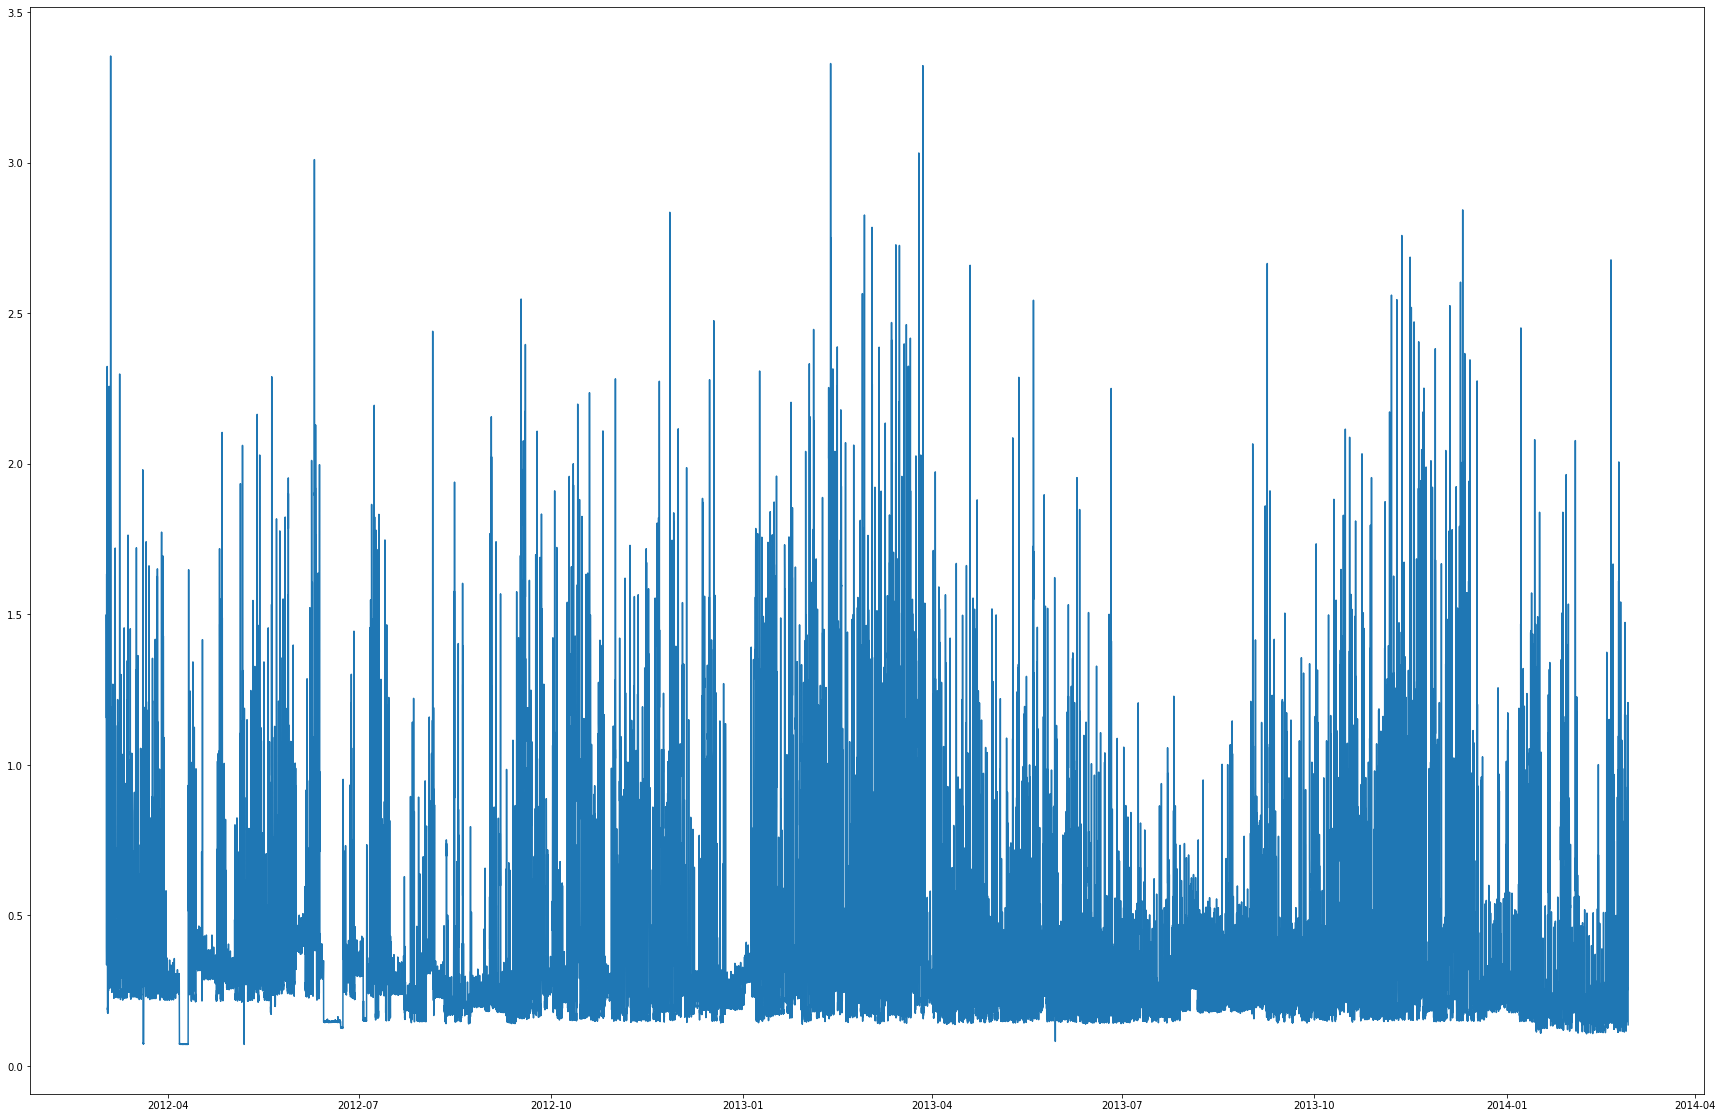

In [159]:
plt.figure(figsize=(30,20))
plt.plot(halfhourly_block12[halfhourly_block12['LCLid']=='MAC000291']['tstp'], halfhourly_block12[halfhourly_block12['LCLid']=='MAC000291']['energy(kWh/hh)'])

In [197]:
halfhourly_block12.index = halfhourly_block12['tstp']

In [198]:
halfhourly_block12['2012'].shape

(606993, 3)

In [199]:
halfhourly_block12['2013'].shape

(856573, 3)

In [200]:
halfhourly_block12['2014'].shape

(127621, 3)

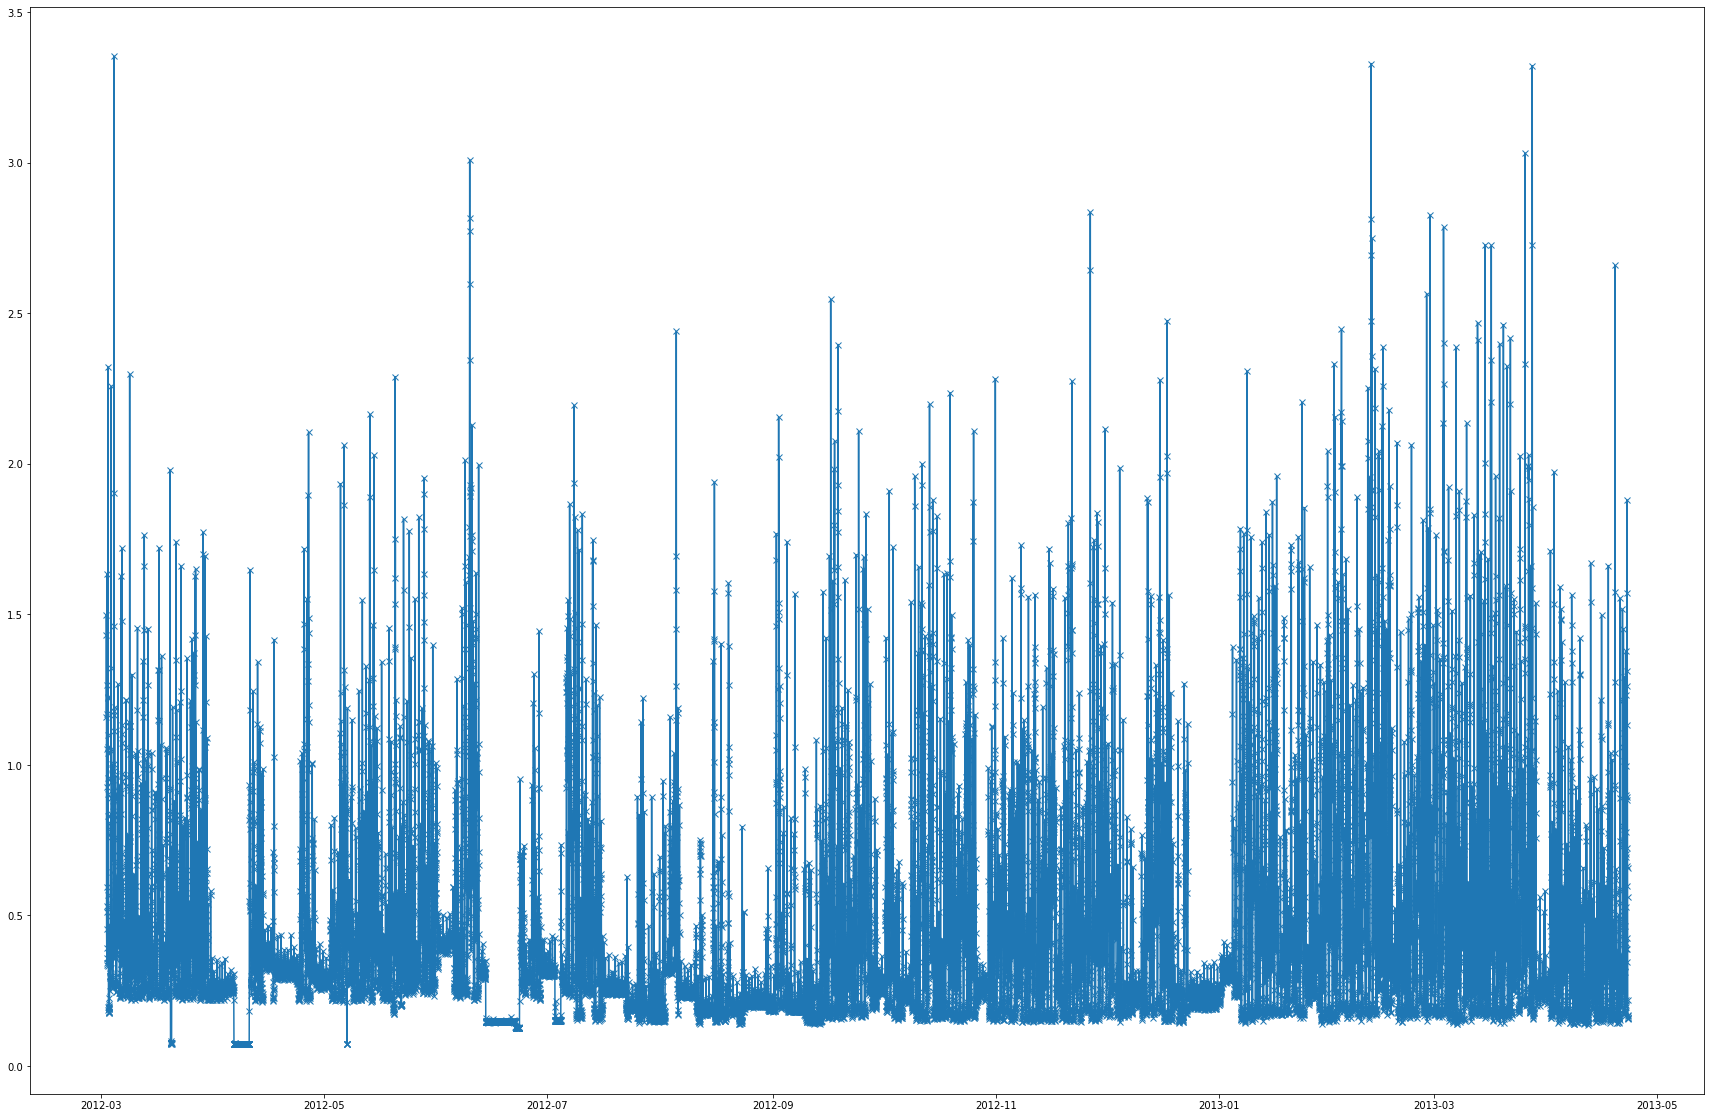

In [165]:
plt.figure(figsize=(30,20))
plt.plot(halfhourly_block12[halfhourly_block12['LCLid']=='MAC000291']['tstp'][:20000], halfhourly_block12[halfhourly_block12['LCLid']=='MAC000291']['energy(kWh/hh)'][:20000], marker='x')

In [201]:
halfhourly_block12.columns

Index(['LCLid', 'tstp', 'energy(kWh/hh)'], dtype='object')

In [202]:
halfhourly_block12.columns = ['LCLid', 'DateTime', 'kWh/hh']

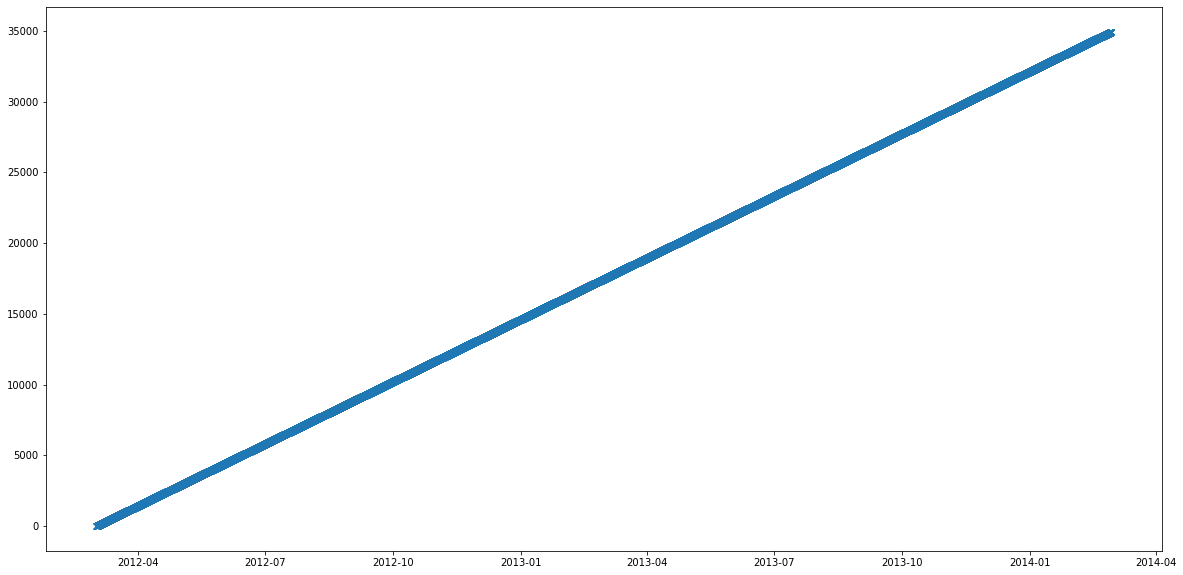

In [203]:
plt.figure(figsize=(20,10))
plt.plot(halfhourly_block12[halfhourly_block12['LCLid']=='MAC000291']['DateTime'], range(len(halfhourly_block12[halfhourly_block12['LCLid']=='MAC000291'])), 'x')

#### 1.5 Client 3718 Smart Meter's data

In [174]:
client_3718 = pd.read_csv('../0.Data/raw_data/client_smart_meter_data.csv')

In [175]:
client_3718.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC003718,Std,17/10/2012 13:00:00,0.09,ACORN-A,Affluent
1,MAC003718,Std,17/10/2012 13:30:00,0.16,ACORN-A,Affluent
2,MAC003718,Std,17/10/2012 14:00:00,0.212,ACORN-A,Affluent
3,MAC003718,Std,17/10/2012 14:30:00,0.145,ACORN-A,Affluent
4,MAC003718,Std,17/10/2012 15:00:00,0.104,ACORN-A,Affluent


In [176]:
client_3718.columns

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) ', 'Acorn',
       'Acorn_grouped'],
      dtype='object')

In [177]:
client_3718.columns = ['LCLid', 'stdorToU', 'DateTime', 'KWH/hh', 'Acorn', 'Acorn_grouped']

In [178]:
client_3718.dtypes

LCLid            object
stdorToU         object
DateTime         object
KWH/hh           object
Acorn            object
Acorn_grouped    object
dtype: object

In [97]:
client_3718.isna().sum()

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
Acorn                      0
Acorn_grouped              0
dtype: int64

In [179]:
client_3718['KWH/hh'][2982] = (float(client_3718['KWH/hh'][2981]) + float(client_3718['KWH/hh'][2983])) /2

In [181]:
client_3718['KWH/hh'] = pd.to_numeric(client_3718['KWH/hh'], errors='coerce')

In [182]:
client_3718.isna().sum()

LCLid            0
stdorToU         0
DateTime         0
KWH/hh           0
Acorn            0
Acorn_grouped    0
dtype: int64

In [100]:
client_3718.columns

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) ', 'Acorn',
       'Acorn_grouped'],
      dtype='object')

In [183]:
client_3718.shape

(17458, 6)

In [184]:
client_3718['DateTime'] = pd.to_datetime(client_3718['DateTime'])

In [185]:
client_3718.index = client_3718['DateTime']

In [186]:
client_3718 = client_3718.sort_index()

In [187]:
client_3718.head()

,LCLid,stdorToU,DateTime,KWH/hh,Acorn,Acorn_grouped
DateTime,,,,,,
2012-01-11 00:00:00,MAC003718,Std,2012-01-11 00:00:00,0.177,ACORN-A,Affluent
2012-01-11 00:30:00,MAC003718,Std,2012-01-11 00:30:00,0.141,ACORN-A,Affluent
2012-01-11 01:00:00,MAC003718,Std,2012-01-11 01:00:00,0.112,ACORN-A,Affluent
2012-01-11 01:30:00,MAC003718,Std,2012-01-11 01:30:00,0.082,ACORN-A,Affluent
2012-01-11 02:00:00,MAC003718,Std,2012-01-11 02:00:00,0.080,ACORN-A,Affluent


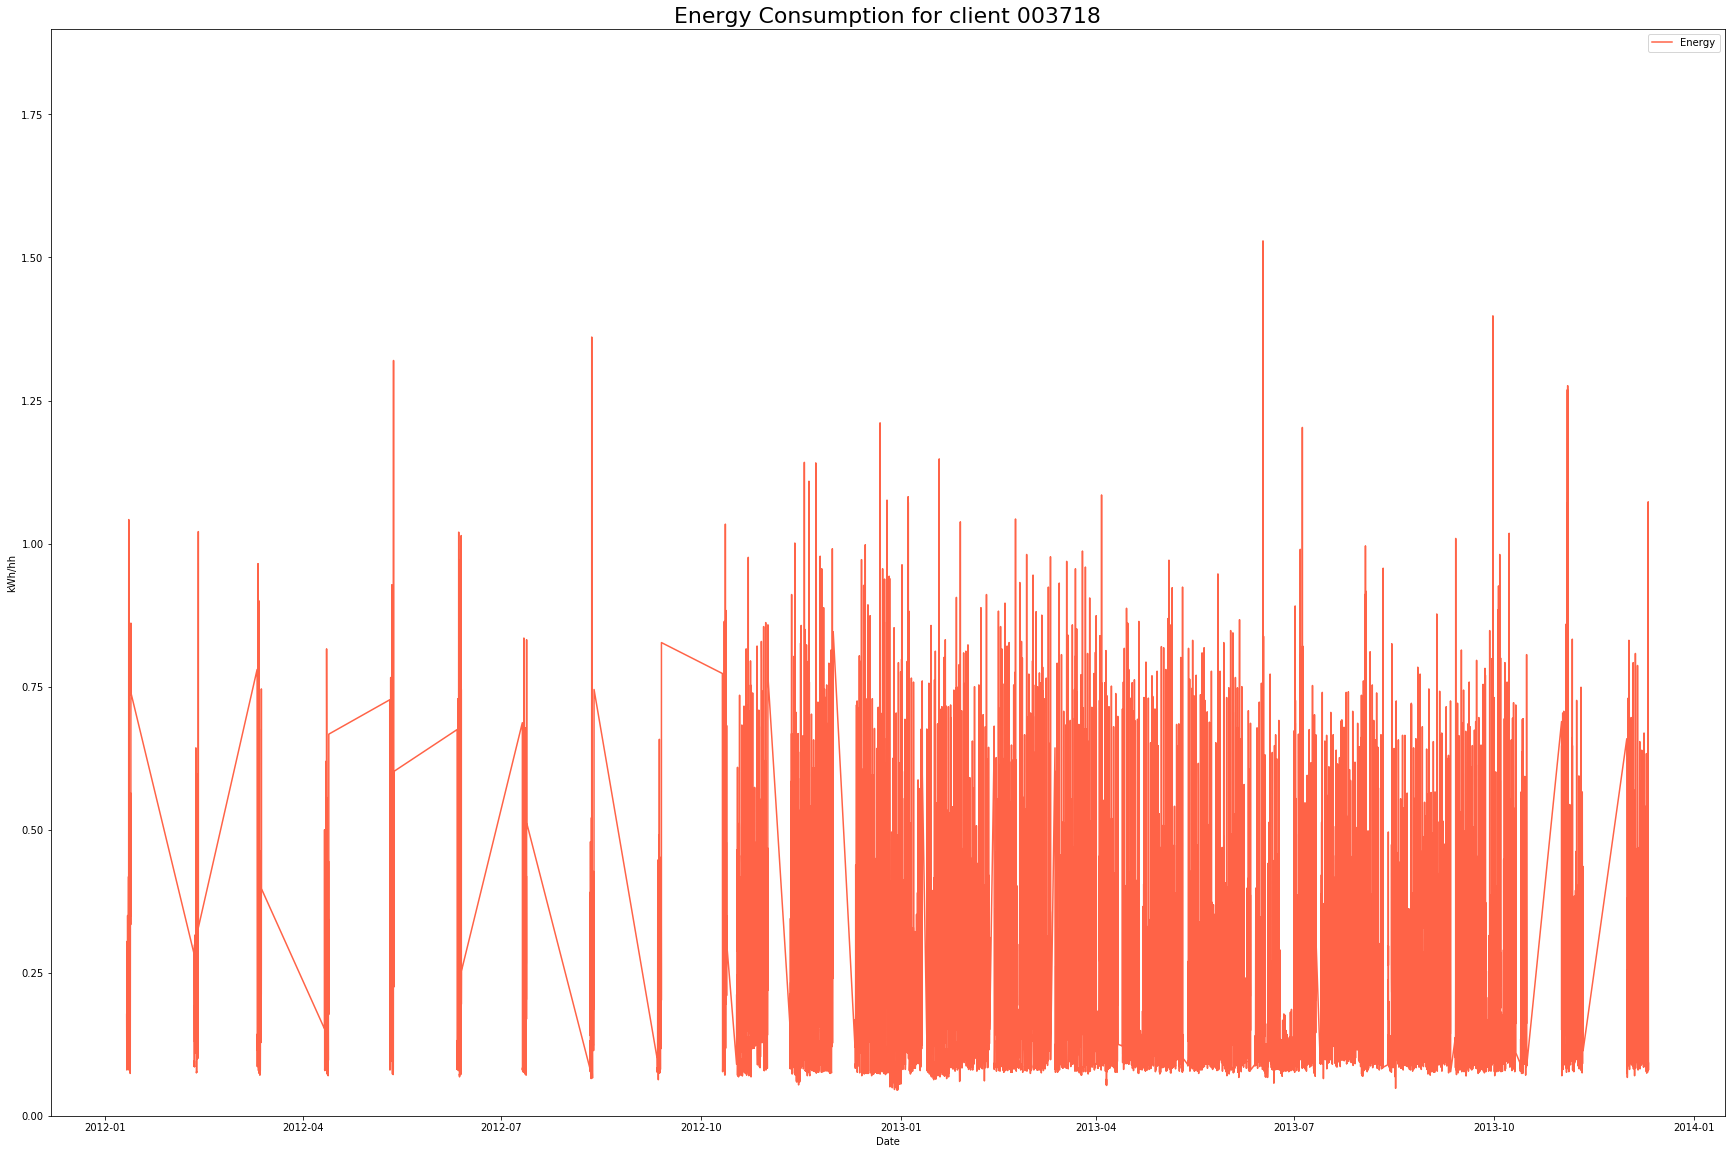

In [188]:
plt.figure(figsize=(30,20))
plt.plot(client_3718.index, client_3718['KWH/hh'], label='Energy', color='tomato' )
plt.ylabel('kWh/hh')
plt.xlabel('Date')
plt.title('Energy Consumption for client 003718', fontsize=22)
#plt.xlim(('2014', '2019'))
plt.ylim(0,1.9)
plt.legend()

#plt.savefig('figures/timeseries_consumption_2014_2018.png', dpi=300)
plt.show()

In [191]:
client_3718['2012'].shape

(3625, 6)

In [192]:
client_3718['2013'].shape

(13833, 6)

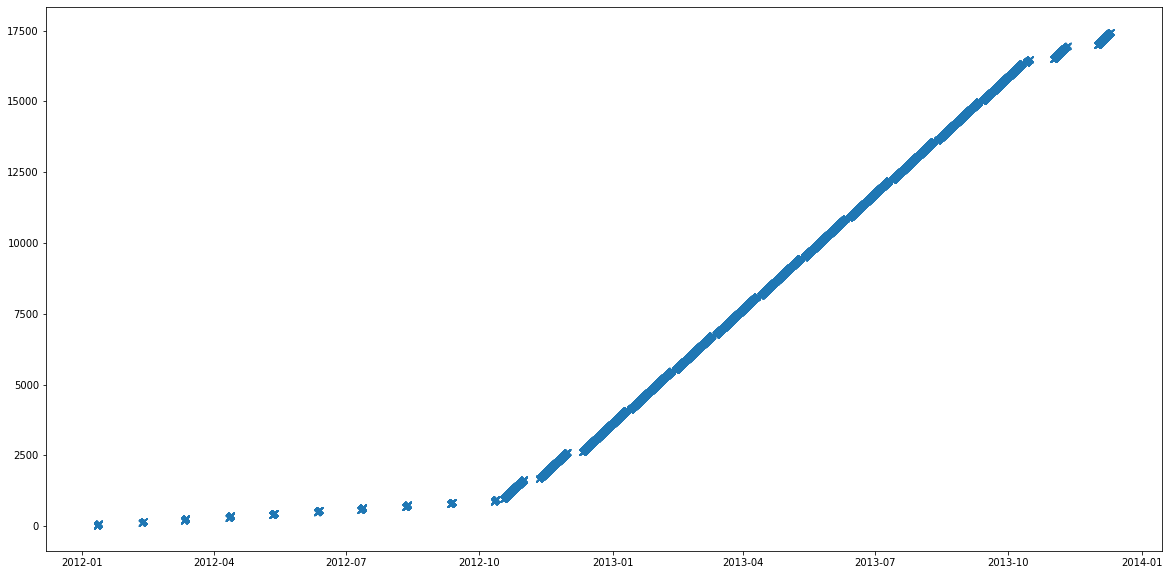

In [196]:
plt.figure(figsize=(20,10))
plt.plot(client_3718.DateTime, range(len(client_3718)), 'x')

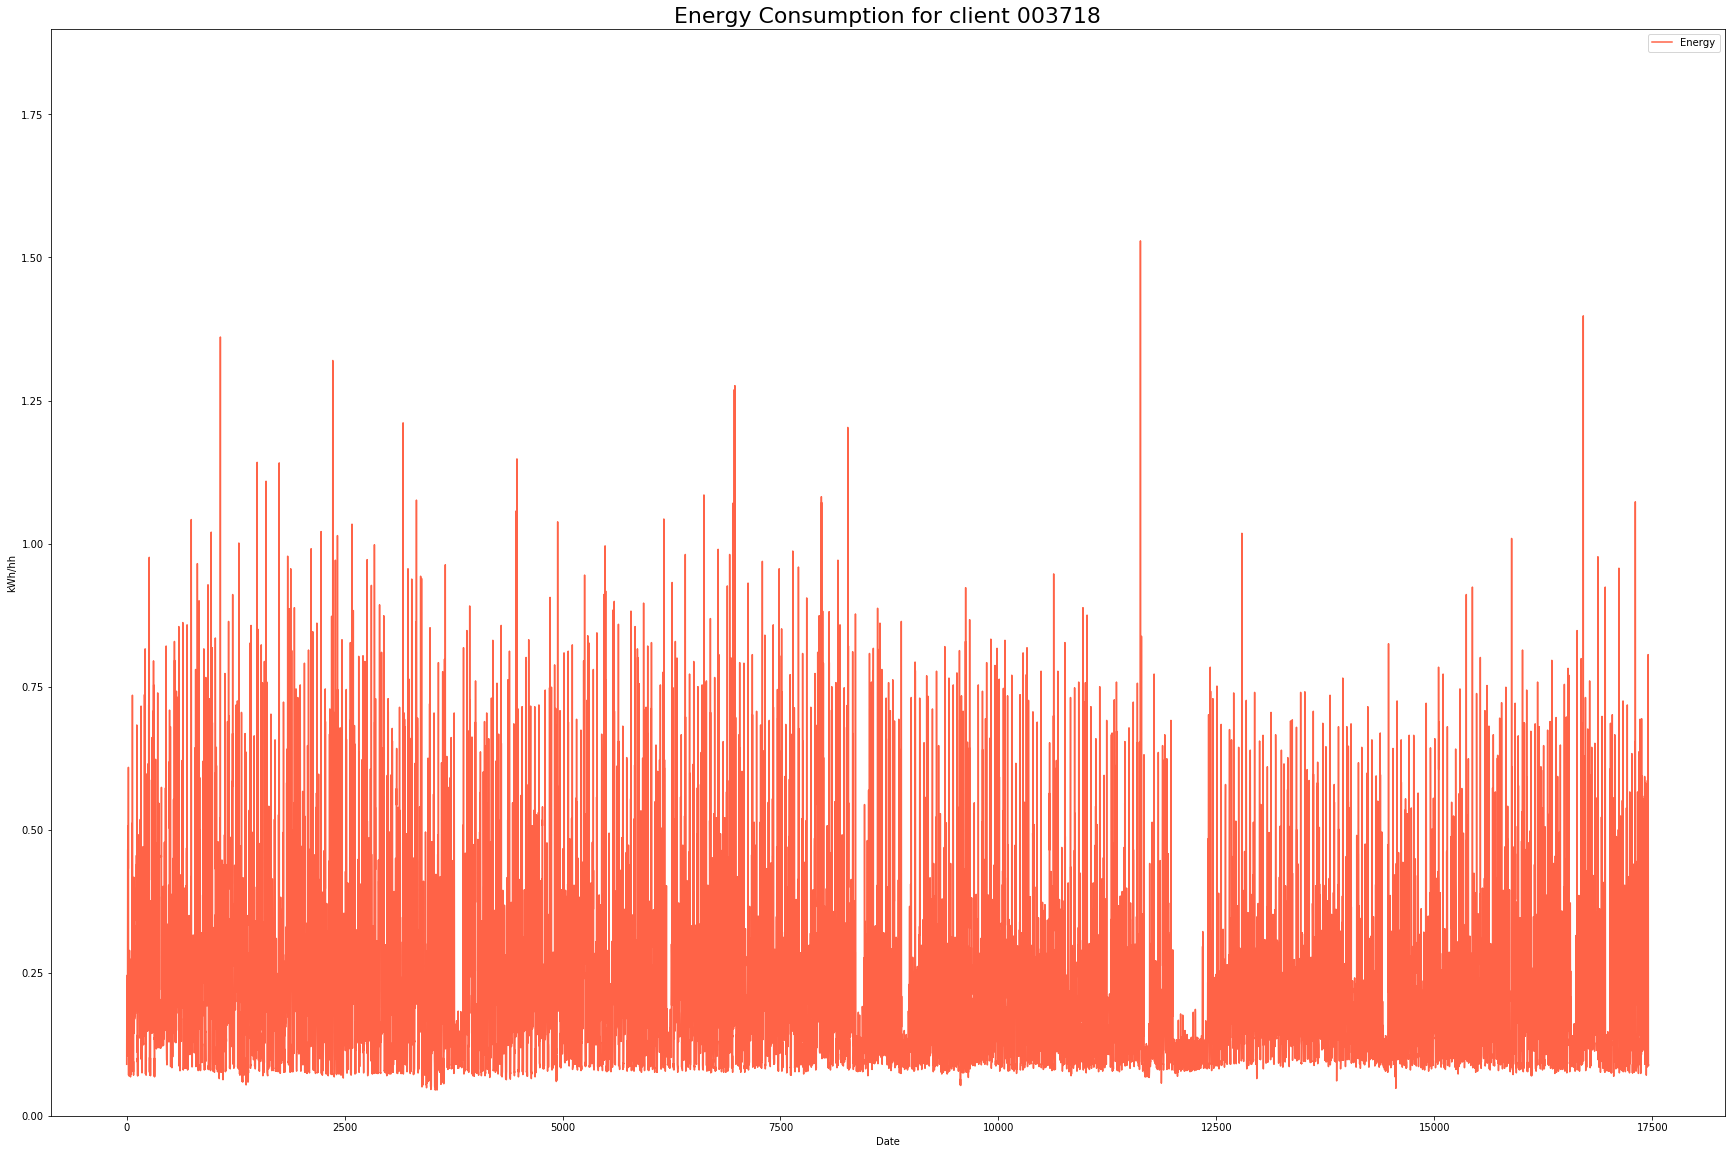

In [104]:
plt.figure(figsize=(30,20))
plt.plot(client_3718.index, client_3718['KWH/hh (per half hour) '], label='Energy', color='tomato' )
plt.ylabel('kWh/hh')
plt.xlabel('Date')
plt.title('Energy Consumption for client 003718', fontsize=22)
#plt.xlim(('2014', '2019'))
plt.ylim(0,1.9)
plt.legend()

#plt.savefig('figures/timeseries_consumption_2014_2018.png', dpi=300)
plt.show()

In [109]:
client_3718.index = client_3718['DateTime']

In [106]:
client_3718.dtypes

LCLid                              object
stdorToU                           object
DateTime                   datetime64[ns]
KWH/hh (per half hour)            float64
Acorn                              object
Acorn_grouped                      object
dtype: object

In [79]:
client_3718.index.unique()

DatetimeIndex(['2012-10-17 13:00:00', '2012-10-17 13:30:00',
               '2012-10-17 14:00:00', '2012-10-17 14:30:00',
               '2012-10-17 15:00:00', '2012-10-17 15:30:00',
               '2012-10-17 16:00:00', '2012-10-17 16:30:00',
               '2012-10-17 17:00:00', '2012-10-17 17:30:00',
               ...
               '2013-10-15 19:30:00', '2013-10-15 20:00:00',
               '2013-10-15 20:30:00', '2013-10-15 21:00:00',
               '2013-10-15 21:30:00', '2013-10-15 22:00:00',
               '2013-10-15 22:30:00', '2013-10-15 23:00:00',
               '2013-10-15 23:30:00', '2013-10-16 00:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=17446, freq=None)

In [81]:
client_3718.index

DatetimeIndex(['2012-10-17 13:00:00', '2012-10-17 13:30:00',
               '2012-10-17 14:00:00', '2012-10-17 14:30:00',
               '2012-10-17 15:00:00', '2012-10-17 15:30:00',
               '2012-10-17 16:00:00', '2012-10-17 16:30:00',
               '2012-10-17 17:00:00', '2012-10-17 17:30:00',
               ...
               '2013-10-15 19:30:00', '2013-10-15 20:00:00',
               '2013-10-15 20:30:00', '2013-10-15 21:00:00',
               '2013-10-15 21:30:00', '2013-10-15 22:00:00',
               '2013-10-15 22:30:00', '2013-10-15 23:00:00',
               '2013-10-15 23:30:00', '2013-10-16 00:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=17458, freq=None)

In [93]:
client_3718['DateTime'].value_counts()

2013-03-24 00:00:00    2
2013-02-21 00:00:00    2
2013-09-26 00:00:00    2
2012-10-20 00:00:00    2
2013-05-25 00:00:00    2
2013-06-25 00:00:00    2
2012-11-20 00:00:00    2
2013-08-26 00:00:00    2
2012-12-21 00:00:00    2
2013-01-21 00:00:00    2
2013-04-24 00:00:00    2
2013-07-26 00:00:00    2
2013-08-06 05:30:00    1
2013-03-07 21:30:00    1
2013-08-21 22:30:00    1
2013-04-19 12:00:00    1
2013-04-15 00:30:00    1
2013-06-17 10:30:00    1
2012-12-27 07:00:00    1
2013-07-24 22:00:00    1
2013-01-09 17:30:00    1
2012-11-11 10:00:00    1
2013-01-14 05:00:00    1
2012-03-11 22:30:00    1
2013-05-25 15:00:00    1
2013-12-01 22:00:00    1
2013-01-27 15:30:00    1
2013-02-01 03:00:00    1
2012-10-24 08:30:00    1
2013-07-20 21:30:00    1
                      ..
2013-03-03 13:00:00    1
2012-01-11 13:00:00    1
2013-01-14 21:30:00    1
2013-10-07 00:00:00    1
2013-01-23 20:30:00    1
2013-12-10 11:30:00    1
2013-08-30 20:00:00    1
2013-03-21 11:00:00    1
2013-02-01 19:30:00    1


In [120]:
client_3718.drop_duplicates(inplace=True)

In [118]:
client_3718['DateTime'].value_counts()

2012-11-11 10:00:00    1
2013-06-17 10:30:00    1
2013-01-09 17:30:00    1
2013-08-06 05:30:00    1
2013-08-21 22:30:00    1
2013-04-19 12:00:00    1
2013-03-07 21:30:00    1
2013-04-15 00:30:00    1
2012-12-27 07:00:00    1
2013-08-22 04:00:00    1
2013-07-24 22:00:00    1
2012-12-22 19:30:00    1
2013-07-19 07:30:00    1
2013-04-01 14:00:00    1
2013-06-10 11:00:00    1
2013-05-19 14:00:00    1
2013-01-14 05:00:00    1
2012-03-11 22:30:00    1
2013-05-25 15:00:00    1
2013-12-01 22:00:00    1
2013-01-27 15:30:00    1
2013-02-01 03:00:00    1
2012-10-24 08:30:00    1
2013-07-20 21:30:00    1
2013-10-08 22:00:00    1
2013-05-25 08:00:00    1
2012-10-28 20:00:00    1
2013-10-10 07:30:00    1
2013-02-14 13:30:00    1
2013-07-31 20:00:00    1
                      ..
2013-01-06 16:30:00    1
2012-06-11 10:30:00    1
2013-03-03 13:00:00    1
2012-01-11 13:00:00    1
2013-01-14 21:30:00    1
2013-10-07 00:00:00    1
2013-01-23 20:30:00    1
2013-12-10 11:30:00    1
2013-08-30 20:00:00    1


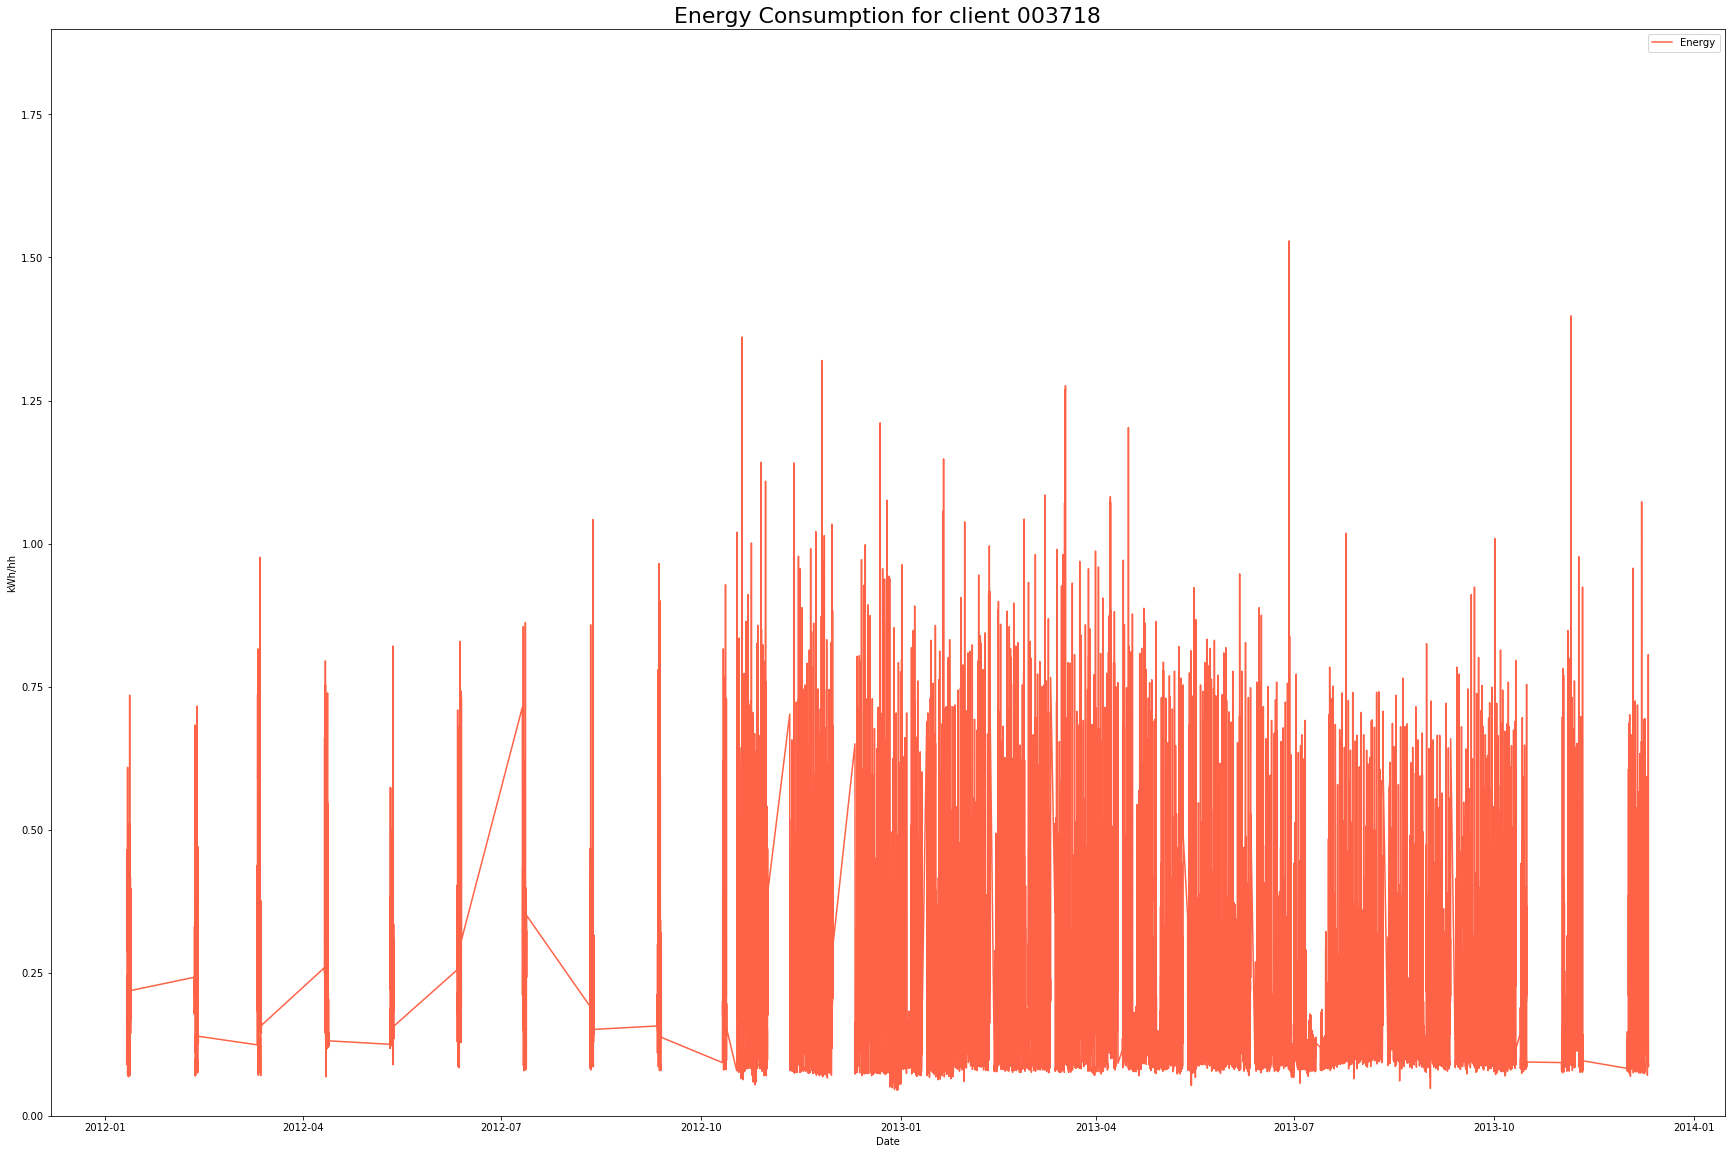

In [143]:
plt.figure(figsize=(30,20))
plt.plot(client_3718.index, client_3718['KWH/hh (per half hour) '], label='Energy', color='tomato' )
plt.ylabel('kWh/hh')
plt.xlabel('Date')
plt.title('Energy Consumption for client 003718', fontsize=22)
#plt.xlim(('2014', '2019'))
plt.ylim(0,1.9)
plt.legend()

#plt.savefig('figures/timeseries_consumption_2014_2018.png', dpi=300)
plt.show()